In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
#from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

In [7]:
test= pd.read_csv('Testing_BOP.csv', na_values = [" "])
train=pd.read_csv('Training_BOP.csv', na_values = [" "])
frames = [test, train]

df=pd.concat(frames)
df.reset_index(drop=True, inplace=True)



In [11]:
df.shape

(1929937, 23)

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929937 entries, 0 to 1929936
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sku                object 
 1   national_inv       float64
 2   lead_time          float64
 3   in_transit_qty     float64
 4   forecast_3_month   float64
 5   forecast_6_month   float64
 6   forecast_9_month   float64
 7   sales_1_month      float64
 8   sales_3_month      float64
 9   sales_6_month      float64
 10  sales_9_month      float64
 11  min_bank           float64
 12  potential_issue    object 
 13  pieces_past_due    float64
 14  perf_6_month_avg   float64
 15  perf_12_month_avg  float64
 16  local_bo_qty       float64
 17  deck_risk          object 
 18  oe_constraint      object 
 19  ppap_risk          object 
 20  stop_auto_buy      object 
 21  rev_stop           object 
 22  went_on_backorder  object 
dtypes: float64(15), object(8)
memory usage: 338.7+ MB


In [8]:
df.describe(include='all')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,19299.0,19299.000000,18120.000000,19299.000000,19299.000000,19299.000000,19299.000000,19299.000000,19299.000000,19299.000000,...,19299.000000,19299.000000,19299.000000,19299.000000,19299,19299,19299,19299,19299,19299
unique,19193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,1272914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,No,No,Yes,No,No
freq,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14888,19295,16988,18582,19291,19135
mean,NaN,313.012488,7.869647,33.084253,148.175501,289.135603,421.550288,46.080211,140.861029,276.432769,...,0.862584,-7.067017,-6.683107,0.367998,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2072.142711,7.109086,695.356961,1796.041258,3529.406781,5096.195573,618.153882,1665.520402,3245.020142,...,17.333003,26.863093,26.245151,12.247949,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-794.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-99.000000,-99.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.630000,0.660000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,15.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,0.820000,0.810000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,81.000000,9.000000,0.000000,4.000000,12.000000,20.000000,4.000000,14.000000,30.000000,...,0.000000,0.970000,0.950000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


Target value distribution

Descriptive Analyses

No     19135
Yes      164
Name: went_on_backorder, dtype: int64
No     99.150215
Yes     0.849785
Name: went_on_backorder, dtype: float64


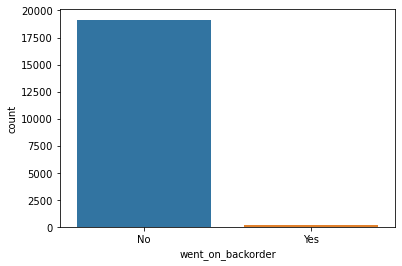

In [9]:
sns.countplot(data=df, x='went_on_backorder')
print(df.went_on_backorder.value_counts())
print(df.went_on_backorder.value_counts(normalize=True)*100)
#print(df.went_on_backorder.value_counts()/df.went_on_backorder.count()*100)

No     77.436908
Yes    22.563092
Name: deck_risk, dtype: float64


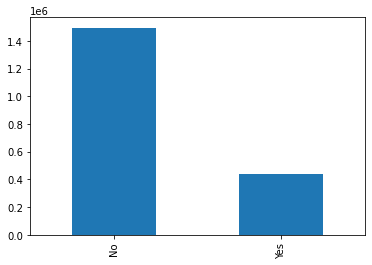

In [9]:
#sns.countplot(data=df, x='deck_risk')
df.deck_risk.value_counts().plot.bar()

print(df.deck_risk.value_counts()/df.deck_risk.count()*100)

No     1929643
Yes        292
Name: oe_constraint, dtype: int64
No     99.98487
Yes     0.01513
Name: oe_constraint, dtype: float64


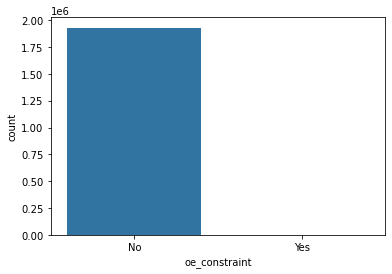

In [10]:
sns.countplot(data=df, x='oe_constraint')
print(df.oe_constraint.value_counts())
print(df.oe_constraint.value_counts()/df.oe_constraint.count()*100)

National Inventory 

<AxesSubplot:xlabel='went_on_backorder', ylabel='lead_time'>

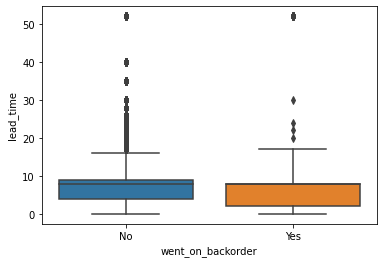

In [14]:

sns.boxplot(x = 'went_on_backorder', y= 'lead_time', data= df)

<AxesSubplot:xlabel='went_on_backorder', ylabel='national_inv'>

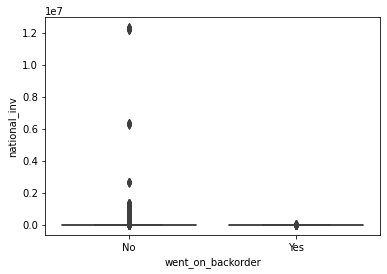

In [15]:
sns.boxplot(x = 'went_on_backorder', y= 'national_inv', data= df)


<AxesSubplot:xlabel='went_on_backorder', ylabel='in_transit_qty'>

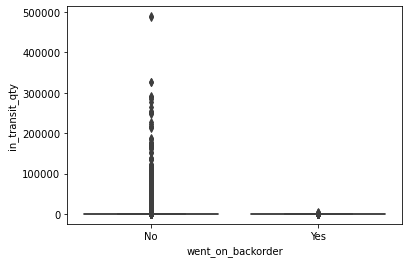

In [16]:
sns.boxplot(x = 'went_on_backorder', y= 'in_transit_qty', data= df)

In [11]:
df1=df[['national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank',  'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty']]

In [8]:

#Ramdom Sampling and reindexing the data
df=df.sample(frac=0.01, replace=True, random_state=1)
df.reset_index(drop=True, inplace=True)


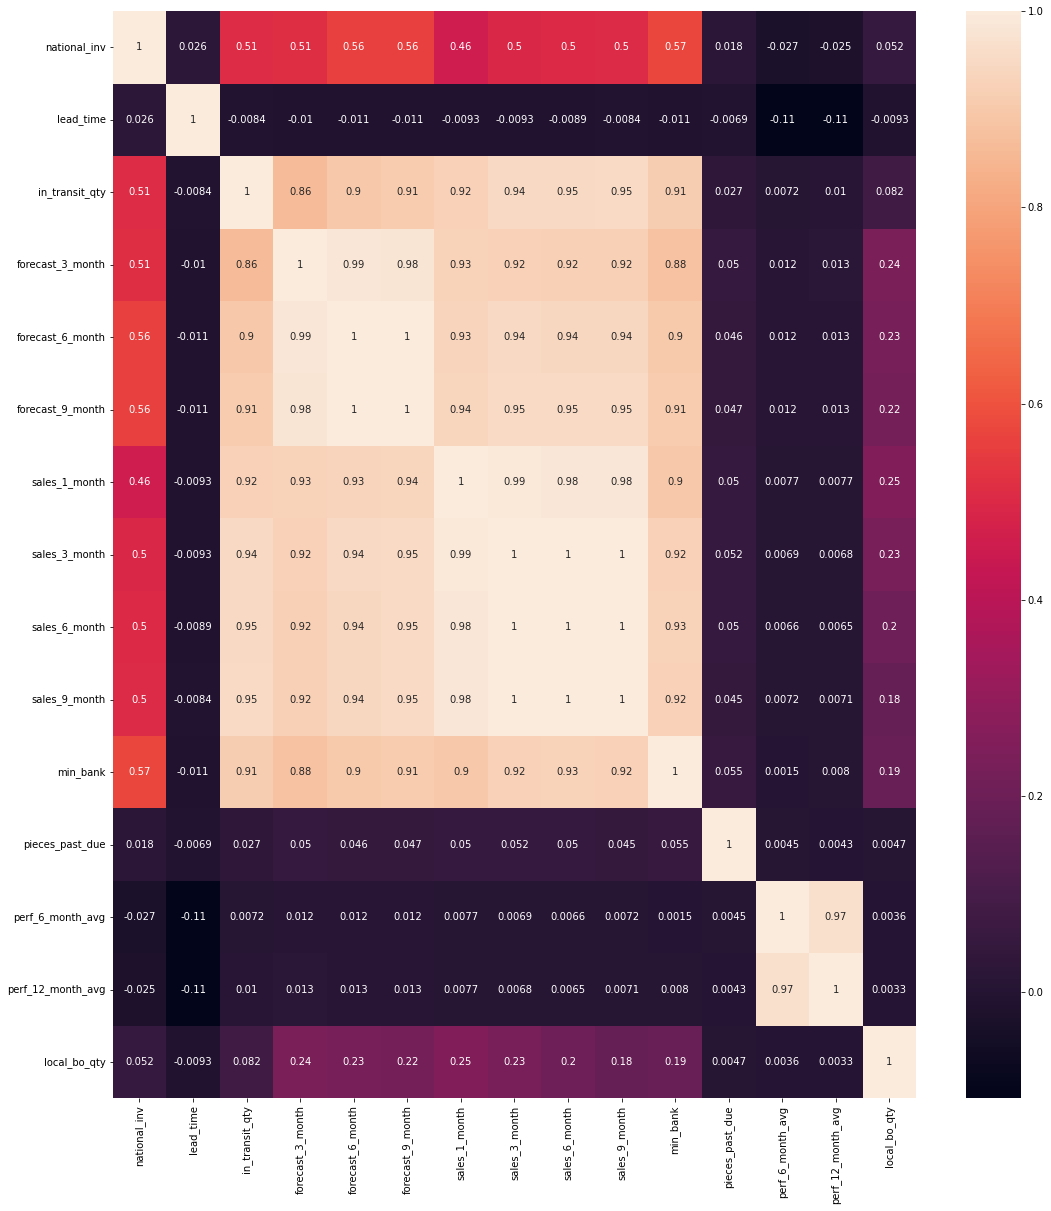

In [9]:
#Heatmap with Correlation Coefficients
plt.figure(figsize = (18,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

Bivariate Analyses

In [10]:
df['target']=df.went_on_backorder.replace({'Yes': 1, 'No': 0})
df['ppap']=df.ppap_risk.replace({'Yes': 1, 'No': 0})
df['auto_buy']=df.stop_auto_buy.replace({'Yes': 1, 'No': 0})
df['rev']=df.rev_stop.replace({'Yes': 1, 'No': 0})
df['deck']=df.deck_risk.replace({'Yes': 1, 'No': 0})
df['oe_con']=df.oe_constraint.replace({'Yes': 1, 'No': 0})
df['issue']=df.potential_issue.replace({'Yes': 1, 'No': 0})


In [11]:
catv= [ 'ppap', 'auto_buy', 'rev', 'deck', 'oe_con', 'issue']


In [12]:
#Chi-square tests for categorical predictors with outcome

from scipy.stats import chi2_contingency
for i in catv:
    tab =pd.crosstab(df.target, df[i])
    stats, p, dof, expected = chi2_contingency(tab)
    if p<=0.05:
        print("There is significant association between backorder and "+i+".")
    else:
        print("There is no significant association between backorder and "+i+".")

There is no significant association between backorder and ppap.
There is no significant association between backorder and auto_buy.
There is no significant association between backorder and rev.
There is no significant association between backorder and deck.
There is no significant association between backorder and oe_con.
There is no significant association between backorder and issue.


In [13]:
# t-tests to determine the mean difference of each of continous variables between status of backorders

conv= [ 'lead_time', 'national_inv', 'in_transit_qty', 'sales_9_month', 'forecast_9_month']


In [14]:
group1 = df[df['went_on_backorder']=="Yes"]
group2 = df[df['went_on_backorder']=="No"]



In [15]:
from scipy.stats import ttest_ind

for i in conv:
    t, p = ttest_ind(group1[i], group2[i])
    if p<=0.05:
        print("There is significant mean difference of "+i+" between the status of the backorders")
    else:
        print("There is no significant mean difference of "+i+" between the status of the backorders")

There is no significant mean difference of lead_time between the status of the backorders
There is no significant mean difference of national_inv between the status of the backorders
There is no significant mean difference of in_transit_qty between the status of the backorders
There is no significant mean difference of sales_9_month between the status of the backorders
There is no significant mean difference of forecast_9_month between the status of the backorders


In [16]:
df.lead_time.fillna(int(df['lead_time'].median()), inplace=True)


##Multiple Logistic Regression##

In [17]:

df = df.dropna()

y_data = df['target']
x_data = df[[ 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank','pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck', 
      'rev', 'ppap', 'auto_buy', 'oe_con', 'issue']]



print(x_data.shape)
print(y_data.shape)

(19299, 21)
(19299,)


In [18]:
#Ordinary logistic regression


import statsmodels.api as sm



#add constant to predictor variables
x_data = sm.add_constant(x_data)

#fit linear regression model
model = sm.OLS(y_data, x_data).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.358
Date:                Wed, 04 Jan 2023   Prob (F-statistic):              0.126
Time:                        13:43:32   Log-Likelihood:                 20584.
No. Observations:               19299   AIC:                        -4.112e+04
Df Residuals:                   19277   BIC:                        -4.095e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0133      0.00

Machine Learning to Predict Backorders

In [19]:
#MinMax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_data)
sx_data = scaler.fit_transform(x_data)
mm_df = pd.DataFrame(sx_data, columns=x_data.columns)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    mm_df,
    y_data,
    test_size=0.2,
    random_state=2022,
    stratify=y_data) # 클래스 비율을 동일하게 분할한다

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15439, 22) (15439,)
(3860, 22) (3860,)


In [21]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, predictions=True)

models, predictions = clf.fit(x_train, x_test, y_train, y_test)

models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:59<00:00,  2.07s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.37,0.57,0.57,0.53,0.05
DecisionTreeClassifier,0.99,0.57,0.57,0.99,0.20
GaussianNB,0.17,0.54,0.54,0.27,0.06
AdaBoostClassifier,0.99,0.54,0.54,0.99,1.54
XGBClassifier,0.99,0.52,0.52,0.99,2.40
LGBMClassifier,0.99,0.52,0.52,0.99,0.41
BernoulliNB,0.99,0.52,0.52,0.99,0.07
RidgeClassifier,0.99,0.50,0.50,0.99,0.09
DummyClassifier,0.99,0.50,0.50,0.99,0.05


In [68]:
predictions.head()

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
from sklearn.metrics import classification_report

for model_name in predictions.columns.tolist():
    print(f'{model_name}')
    print(classification_report(y_test, predictions[model_name]))

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3833
           1       0.17      0.04      0.06        27

    accuracy                           0.99      3860
   macro avg       0.58      0.52      0.53      3860
weighted avg       0.99      0.99      0.99      3860

BaggingClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3833
           1       0.00      0.00      0.00        27

    accuracy                           0.99      3860
   macro avg       0.50      0.50      0.50      3860
weighted avg       0.99      0.99      0.99      3860

BernoulliNB
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3833
           1       0.11      0.04      0.06        27

    accuracy                           0.99      3860
   macro avg       0.55      0.52      0.53      3860
weighted avg       0.99  